## Figure 2: Applications Panel DiD Event Study Estimates

from White Flight in Higher Education? The Case of Hispanic-Serving Institutions

by Laura Hamilton, Charlie Eaton, and Simon Cheng

In [1]:
qui {
    use data/hsi_ca_tx_applications, clear

   * use data/hsi_white_enrollment_final2, clear
    drop if lnWhite_app==. | lnpopulationwh==.
   
   drop hispserveyear
    gen hispserveyear=year if hispserve==1
   bysort unitid: egen hispserveyearall=min(hispserveyear)
gen treated=0
replace treated=1 if year>=hispserveyearall
    drop if year>2019 | year<2000
    bysort unitid: egen maxyear=max(year)
bysort unitid: egen minyear=min(year)
    gen missingpanel=.
    bysort unitid (year): replace missingpanel=1 if year[_n-1]!=year-1
    replace missingpanel=. if year==2000
    bysort unitid: egen missingpanelall=min(missingpanel)
    replace missingpanelall=1 if maxyear!=2019 | minyear !=2000
    
    bysort unitid: egen alwaystreated=min(treated)
bysort unitid: egen evertreated=max(treated)

}

In [2]:
drop if alwaystreated==1
drop if missingpanelall==1

(375 observations deleted)
(67 observations deleted)


In [3]:
egen gvar=csgvar(treated), tvar(year) ivar(unitid)

In [5]:
tab year if year==gvar


       year |      Freq.     Percent        Cum.
------------+-----------------------------------
       2003 |          1        4.17        4.17
       2004 |          1        4.17        8.33
       2006 |          2        8.33       16.67
       2009 |          1        4.17       20.83
       2010 |          3       12.50       33.33
       2011 |          1        4.17       37.50
       2012 |          1        4.17       41.67
       2013 |          4       16.67       58.33
       2014 |          6       25.00       83.33
       2015 |          2        8.33       91.67
       2017 |          1        4.17       95.83
       2018 |          1        4.17      100.00
------------+-----------------------------------
      Total |         24      100.00


In [14]:
csdid2 lnWhite_app lnpop* lncpop*, ivar(unitid) time(year) gvar(gvar) ///
        method(reg) agg(group)

Producing Long Gaps by default
----+--- 1 ---+--- 2 ---+--- 3 ---+--- 4 ---+--- 5 
..................................................    50
..................................................   100
..................................................   150
..................................................   200
............................
Difference-in-difference with Multiple Time Periods
Outcome model  : regression adjustment
Treatment model: none
------------------------------------------------------------------------------
             |               Robust
             | Coefficient  std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
    GAverage |  -.1358727   .0426332    -3.19   0.001    -.2194322   -.0523133
       g2003 |  -.2309829   .1583385    -1.46   0.145    -.5413207    .0793549
       g2004 |   .0535051   .0892631     0.60   0.549    -.1214473    .2284575
       g2006 |  -.4939925   .1865308 

..................................................
..................................................
..................................................
..................................................
............................
Difference-in-difference with Multiple Time Periods

                                                           Number of obs = 840
Outcome model  : regression adjustment
Treatment model: none
------------------------------------------------------------------------------
             | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
         ATT |  -.1855889   .0675024    -2.75   0.006    -.3178912   -.0532867
------------------------------------------------------------------------------
Control: Never Treated

See Callaway and Sant'Anna (2021) for details
ATT by Periods Before and After treatment
Event Study:Dynamic effects
---------------------------------------

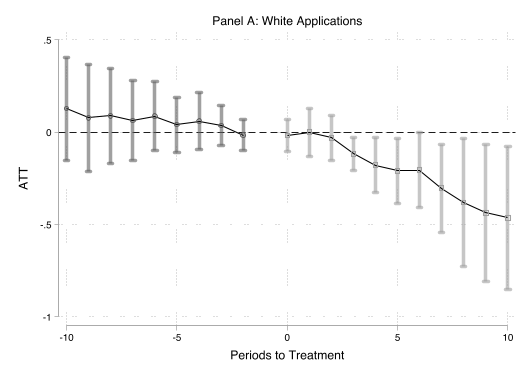

In [7]:
csdid lnWhite_app lnpop* lncpop*, ivar(unitid) time(year) gvar(gvar) ///
        method(reg) agg(simple) long2
csdid_estat event, window(-9 10)
csdid_plot, style(rcap) scheme(plotplain) legend(off) title(Panel A: White Applications)

In [6]:
graph export figures/f5a_event_white_applications.pdf, replace

file figures/f5a_event_white_applications.pdf saved as PDF format


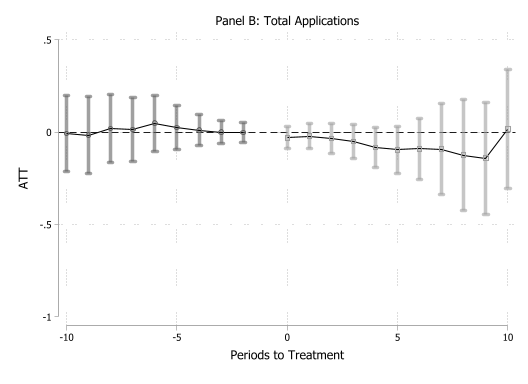

In [17]:
csdid lntot_app lnpop* lncpop*, ivar(unitid) time(year) gvar(gvar) ///
        method(reg) agg(simple) long2
qui csdid_estat event, window(-9 10) 
csdid_plot, style(rcap) scheme(plotplain) ylabel(-1(.5).5) ///
legend(off) title(Panel B: Total Applications)

In [18]:
graph export figures/f5b_event_total_applications.pdf, replace

file figures/f5b_event_total_applications.pdf saved as PDF format


In [10]:
tab year if year==gvar


       year |      Freq.     Percent        Cum.
------------+-----------------------------------
       2003 |          1        4.17        4.17
       2004 |          1        4.17        8.33
       2006 |          2        8.33       16.67
       2009 |          1        4.17       20.83
       2010 |          3       12.50       33.33
       2011 |          1        4.17       37.50
       2012 |          1        4.17       41.67
       2013 |          4       16.67       58.33
       2014 |          6       25.00       83.33
       2015 |          2        8.33       91.67
       2017 |          1        4.17       95.83
       2018 |          1        4.17      100.00
------------+-----------------------------------
      Total |         24      100.00
